In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import scipy
import os

In [14]:
# project files

from utils.variables import pack, unpack
from utils.display import table, tabulate
from utils.files import download_sheet, save, load
from utils.hash import digest

from fit_options import fit_options
from utils.rounding import soft_round, soft_floor, soft_round_options

In [3]:
# stuff for display

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)

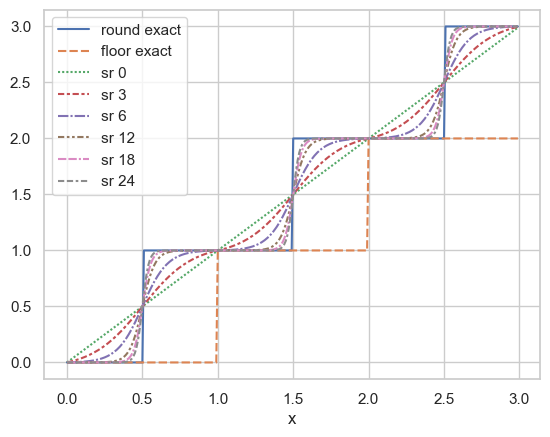

In [12]:
x = np.arange(0.0,3,0.01)
data = pd.DataFrame({
    'x': x,
    f'round exact': np.round(x),
    f'floor exact': np.floor(x),
    f'sr 0': soft_round(x, 0),
    f'sr 3': soft_round(x, 3),
    f'sr 6': soft_round(x, 6),
    f'sr 12': soft_round(x, 12),
    f'sr 18': soft_round(x, 18),
    f'sr 24': soft_round(x, 24),
}).set_index('x')

f = plt.figure()
g = sns.lineplot(data)


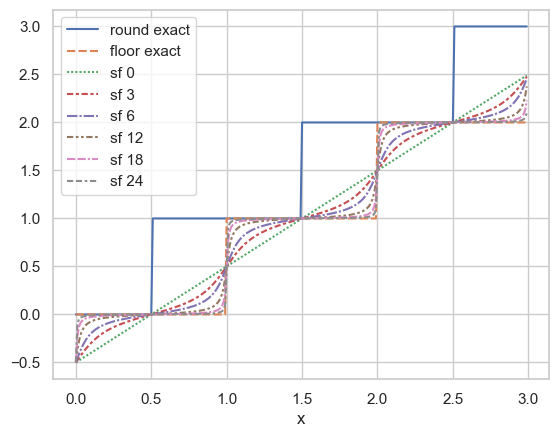

In [15]:
soft_round_options.use_integer_bias = False

data = pd.DataFrame({
    'x': x,
    f'round exact': np.round(x),
    f'floor exact': np.floor(x),
    f'sf 0': soft_floor(x, 0),
    f'sf 3': soft_floor(x, 3),
    f'sf 6': soft_floor(x, 6),
    f'sf 12': soft_floor(x, 12),
    f'sf 18': soft_floor(x, 18),
    f'sf 24': soft_floor(x, 24),
}).set_index('x')

f = plt.figure()
g = sns.lineplot(data)

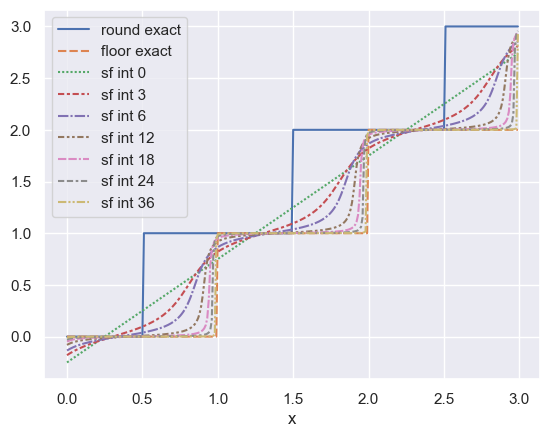

In [9]:
soft_round_options.use_integer_bias = True

data = pd.DataFrame({
    'x': x,
    f'round exact': np.round(x),
    f'floor exact': np.floor(x),
    f'sf 0': soft_floor(x, 0),
    f'sf 3': soft_floor(x, 3),
    f'sf 6': soft_floor(x, 6),
    f'sf 12': soft_floor(x, 12),
    f'sf 18': soft_floor(x, 18),
    f'sf 24': soft_floor(x, 24),
}).set_index('x')

f = plt.figure()
g = sns.lineplot(data)

In [17]:
soft_round_options.use_integer_bias = True
alphas = [12, 18, 24]

for alpha in alphas:

    soft_round_options.alpha = alpha

    print( f"alpha={alpha}")
    table([
    (100*1.22, np.floor(100*1.22), soft_floor(100*1.22) ),
    (100*1.22*1.08, np.floor(100*1.22*1.08), soft_floor(100*1.22*1.08) ),
    (100*1.22*0.92, np.floor(100*1.22*0.92), soft_floor(100*1.22*0.92) ),

    (100*1.07, np.floor(100*1.07) , soft_floor(100*1.07)),
    (100*1.131, np.floor(100*1.131) , soft_floor(100*1.131)),
    (100*1.18, np.floor(100*1.18) , soft_floor(100*1.18)),

    (100*1.07*1.08, np.floor(100*1.07*1.08) , soft_floor(100*1.07*1.08)),
    (100*1.13*1.08, np.floor(100*1.13*1.08) , soft_floor(100*1.13*1.08)),
    (100*1.18*1.08, np.floor(100*1.18*1.08) , soft_floor(100*1.18*1.08)),

    (100*1.07*0.92, np.floor(100*1.07*0.92) , soft_floor(100*1.07*0.92)),
    (100*1.13*0.92,  np.floor(100*1.13*0.92) , soft_floor(100*1.13*0.92)),
    (100*1.18*0.92, np.floor(100*1.18*0.92) , soft_floor(100*1.18*0.92)),
    ], floatfmt=".3f")

alpha=12


122.000,122.000,121.920
131.760,131.000,131.048
112.240,112.000,111.986
107.000,107.000,106.920
113.100,113.000,112.965
118.000,118.000,117.920
115.560,115.000,115.013
122.040,122.000,121.945
127.440,127.000,127.002
98.440,98.000,98.002
103.960,103.000,103.861


alpha=18


122.000,122.000,121.951
131.760,131.000,131.013
112.240,112.000,111.993
107.000,107.000,106.951
113.100,113.000,112.984
118.000,118.000,117.951
115.560,115.000,115.003
122.040,122.000,121.972
127.440,127.000,127.000
98.440,98.000,98.000
103.960,103.000,103.838


alpha=24


122.000,122.000,121.970
131.760,131.000,131.004
112.240,112.000,111.997
107.000,107.000,106.970
113.100,113.000,112.993
118.000,118.000,117.970
115.560,115.000,115.001
122.040,122.000,121.986
127.440,127.000,127.000
98.440,98.000,98.000
103.960,103.000,103.154


In [18]:
soft_round_options.use_integer_bias = False
alphas = [12, 18, 24]

for alpha in alphas:

    soft_round_options.alpha = alpha

    print( f"alpha={alpha}")
    table([
    (100*1.22, np.floor(100*1.22), soft_floor(100*1.22) ),
    (100*1.22*1.08, np.floor(100*1.22*1.08), soft_floor(100*1.22*1.08) ),
    (100*1.22*0.92, np.floor(100*1.22*0.92), soft_floor(100*1.22*0.92) ),

    (100*1.07, np.floor(100*1.07) , soft_floor(100*1.07)),
    (100*1.131, np.floor(100*1.131) , soft_floor(100*1.131)),
    (100*1.18, np.floor(100*1.18) , soft_floor(100*1.18)),

    (100*1.07*1.08, np.floor(100*1.07*1.08) , soft_floor(100*1.07*1.08)),
    (100*1.13*1.08, np.floor(100*1.13*1.08) , soft_floor(100*1.13*1.08)),
    (100*1.18*1.08, np.floor(100*1.18*1.08) , soft_floor(100*1.18*1.08)),

    (100*1.07*0.92, np.floor(100*1.07*0.92) , soft_floor(100*1.07*0.92)),
    (100*1.13*0.92,  np.floor(100*1.13*0.92) , soft_floor(100*1.13*0.92)),
    (100*1.18*0.92, np.floor(100*1.18*0.92) , soft_floor(100*1.18*0.92)),
    ], floatfmt=".3f")

alpha=12


122.000,122.000,121.500
131.760,131.000,131.026
112.240,112.000,111.974
107.000,107.000,106.500
113.100,113.000,112.926
118.000,118.000,117.500
115.560,115.000,115.005
122.040,122.000,121.827
127.440,127.000,126.995
98.440,98.000,97.995
103.960,103.000,103.173


alpha=18


122.000,122.000,121.500
131.760,131.000,131.009
112.240,112.000,111.991
107.000,107.000,106.500
113.100,113.000,112.973
118.000,118.000,117.500
115.560,115.000,115.002
122.040,122.000,121.932
127.440,127.000,126.998
98.440,98.000,97.998
103.960,103.000,103.068


alpha=24


122.000,122.000,121.500
131.760,131.000,131.003
112.240,112.000,111.997
107.000,107.000,106.500
113.100,113.000,112.990
118.000,118.000,117.500
115.560,115.000,115.001
122.040,122.000,121.974
127.440,127.000,126.999
98.440,98.000,97.999
103.960,103.000,103.026
